In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
PATH = "../data"
!ls {PATH}

data_description.txt   sample_submission.csv.gz  test.csv.gz  train.csv.gz
sample_submission.csv  test.csv			 train.csv


In [5]:
import os

In [100]:
class DataSet:
    
    def __init__(self, folder, **paths):
        folder = folder or "."
        m = [(key, pd.read_csv(os.path.join(folder, path))) for (key, path) in paths.items()]
        [keys, dfs] = list(zip(*m))
        self._df = pd.concat(list(dfs), keys=list(keys))
    
    def __getattr__(self, attr):
        return self.df(attr)
    
    @property
    def total(self):
         return self.df()
        
    @property
    def keys(self):
        return list(self.df().index.levels[0])
    
    def df(self, key=None):
        if not key:
            return self._df
        else:
            return self._df.loc[key]

In [107]:
ds = DataSet(PATH, train="train.csv", test="test.csv")

In [113]:
def count_na(ds):
    na = pd.concat([ds.df(key).isna().sum() for key in ds.keys], axis=1, keys=ds.keys)
    f = False
    for key in ds.keys:
        f = f | na[key]
    return na[f]

print(len(ds.train), len(ds.test))
count_na(ds).sort_values(by='train', ascending=False)

1460 1459


,train,test
PoolQC,1453,1456
MiscFeature,1406,1408
Alley,1369,1352
Fence,1179,1169
FireplaceQu,690,730
LotFrontage,259,227
GarageType,81,76
GarageQual,81,78
GarageFinish,81,78
GarageCond,81,78


In [119]:
pd.Series({c: len(ds.total[c].unique()) for c in ds.total}).sort_values()

CentralAir          2
Street              2
Utilities           3
Alley               3
HalfBath            3
LandSlope           3
PavedDrive          3
KitchenAbvGr        4
LandContour         4
ExterQual           4
LotShape            4
BsmtHalfBath        4
GarageFinish        4
PoolQC              4
MiscFeature         5
FullBath            5
HeatingQC           5
Fireplaces          5
BldgType            5
Fence               5
KitchenQual         5
BsmtCond            5
BsmtExposure        5
ExterCond           5
LotConfig           5
MasVnrType          5
BsmtQual            5
BsmtFullBath        5
YrSold              5
RoofStyle           6
                 ... 
MoSold             12
TotRmsAbvGrd       14
PoolArea           14
Exterior1st        16
MSSubClass         16
Exterior2nd        17
Neighborhood       25
3SsnPorch          31
LowQualFinSF       36
MiscVal            38
YearRemodAdd       61
GarageYrBlt       104
YearBuilt         118
ScreenPorch       121
LotFrontag

In [155]:
(w, h) = plt.rcParams['figure.figsize']

In [159]:
plt.rcParams['figure.figsize'] = (3 * w, 3 * h)

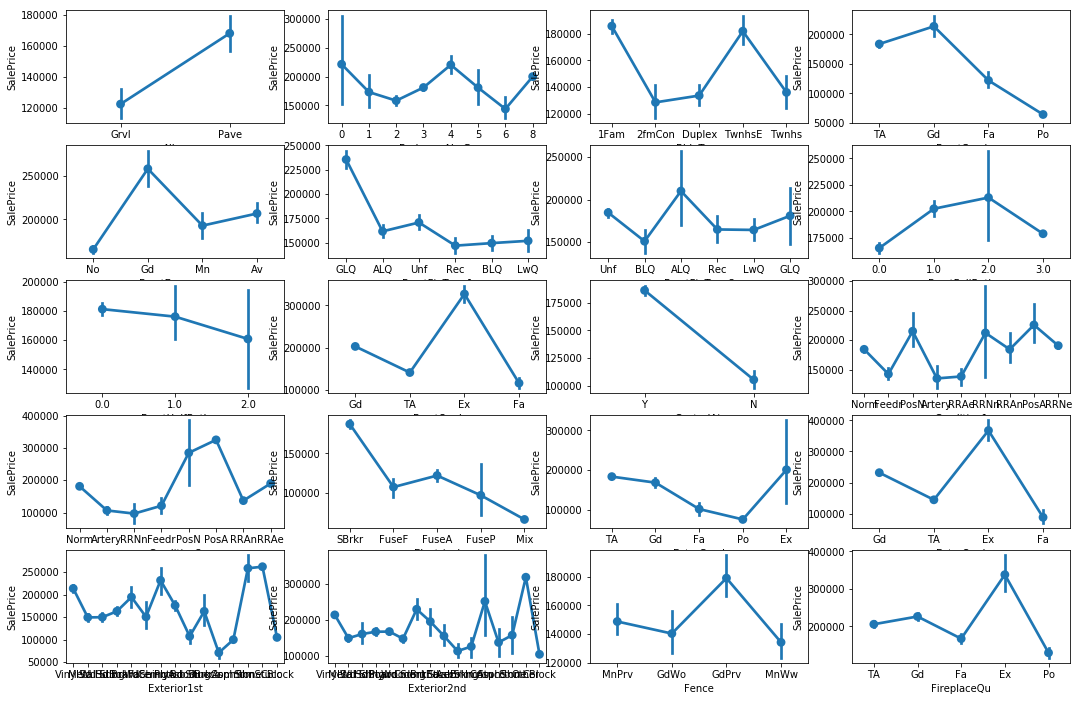

In [162]:
# TODO: use joint y-axis
r = 5; c = 4
fig, ax = plt.subplots(r, c)
i = 0
for col in ds.train.columns:
    if len(ds.train[col].unique()) < 20:
        g = sns.factorplot(x=col, y='SalePrice', data=ds.train, ax=ax[i // c, i % c]);
        plt.close(g.fig)
        i += 1
    if i >= r * c:
        break
        
plt.show()

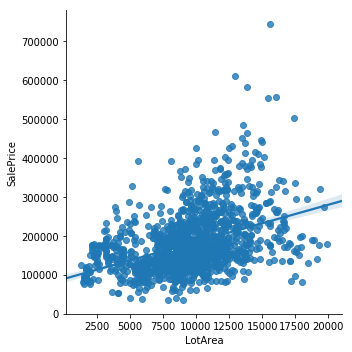

In [130]:
sns.lmplot(x='LotArea', y='SalePrice', data=ds.train[ds.train.LotArea < 20000])

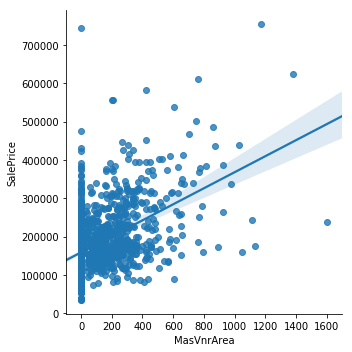

In [131]:
sns.lmplot(x='MasVnrArea', y='SalePrice', data=ds.train)